<a href="https://colab.research.google.com/github/RidouanBani/Pytorch_ML/blob/master/MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.functional as F
import torch.nn as nn
from torchvision import datasets, transforms

In [3]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,),(0.5,))
                               ])
training_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
validation_dataset = datasets.MNIST(root='./data', train = False, download = True, transform = transform)

training_loader = torch.utils.data.DataLoader(dataset=training_dataset, batch_size=100, shuffle=True)
validation_loader = torch.utils.data.DataLoader(dataset = validation_dataset, batch_size = 100, shuffle = False)

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [4]:
def im_convert(tensor):
  image = tensor.clone().detach().numpy()
  image = image.transpose(1,2,0)
  image = image*np.array((0.5,0.5,0.5))+np.array((0.5,0.5,0.5))
  image = image.clip(0,1)
  return image

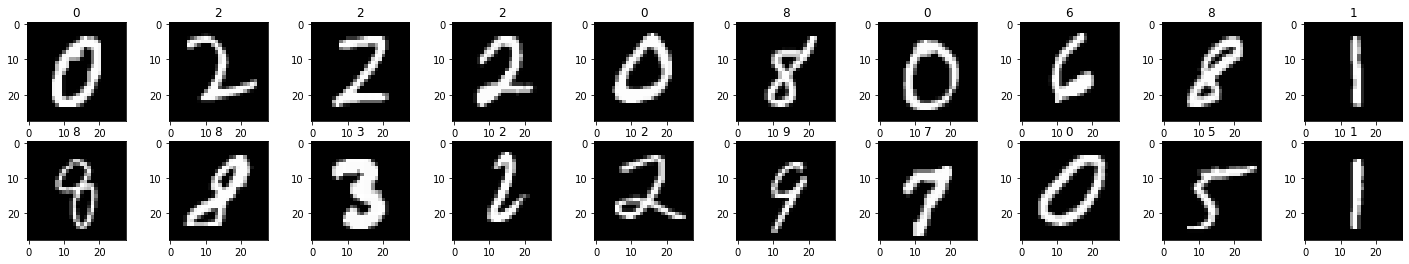

In [5]:
dataiter = iter(training_loader)
images, labels = dataiter.next()
fig = plt.figure(figsize=(25,4))

for idx in np.arange(20):
  ax = fig.add_subplot(2,10, idx+1)
  plt.imshow(im_convert(images[idx]))
  ax.set_title(labels[idx].item())

In [6]:
class Classifier(nn.Module):
  def __init__(self, input_size, H1, H2, output_size):
    super().__init__()
    self.linear1 = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, H2)
    self.linear3 = nn.Linear(H2, output_size)
  def forward(self, x):
    x = F.relu(self.linear1(x))
    x = F.relu(self.linear2(x))
    x = self.linear3(x)
    return x

In [7]:
model = Classifier(784, 225, 165, 10)
model

Classifier(
  (linear1): Linear(in_features=784, out_features=225, bias=True)
  (linear2): Linear(in_features=225, out_features=165, bias=True)
  (linear3): Linear(in_features=165, out_features=10, bias=True)
)

In [8]:
creterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.0001)

In [9]:
epochs = 30
running_loss_history = []
running_corrects_history = []
val_running_loss_history = []
val_running_corrects_history = []

for i in range(epochs):

  running_loss = 0.0
  running_corrects = 0.0
  val_running_loss = 0.0
  val_running_corrects = 0.0

  for inputs, labels in training_loader:
    inputs = inputs.view(inputs.shape[0], -1)
    outputs = model(inputs)
    loss = creterion(outputs,labels)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, preds = torch.max(outputs, 1)
    running_loss += loss.item()
    running_corrects += torch.sum(preds == labels.data)

  else:
    with torch.no_grad():
      for val_inputs, val_labels in validation_loader:
        val_inputs = val_inputs.view(val_inputs.shape[0], -1)
        val_outputs = model(val_inputs)
        val_loss = creterion(val_outputs,val_labels)

        _, val_preds = torch.max(val_outputs, 1)
        val_running_loss += val_loss.item()
        val_running_corrects += torch.sum(val_preds == val_labels.data)   

    epoch_loss = running_loss/len(training_loader)
    epoch_acc = running_corrects.float()/len(training_loader)
    running_loss_history.append(epoch_loss)
    running_corrects_history.append(epoch_acc)

    val_epoch_loss = val_running_loss/len(validation_loader)
    val_epoch_acc = val_running_corrects.float()/len(validation_loader)
    val_running_loss_history.append(val_epoch_loss)
    val_running_corrects_history.append(val_epoch_acc)

    print('training loss, training accuracy: {:.4f}, {:.4f}'.format(epoch_loss, epoch_acc.item()))
    print('val_training loss, val_training accuracy: {:.4f}, {:.4f}'.format(val_epoch_loss, val_epoch_acc.item()))

training loss, training accuracy: 0.7539, 80.6300
val_training loss, val_training accuracy: 0.3423, 90.1600
training loss, training accuracy: 0.3182, 90.7417
val_training loss, val_training accuracy: 0.2721, 92.1000
training loss, training accuracy: 0.2618, 92.3550
val_training loss, val_training accuracy: 0.2343, 93.2000
training loss, training accuracy: 0.2258, 93.4683
val_training loss, val_training accuracy: 0.2093, 94.0100
training loss, training accuracy: 0.1973, 94.3117
val_training loss, val_training accuracy: 0.1839, 94.6200
training loss, training accuracy: 0.1760, 94.8667
val_training loss, val_training accuracy: 0.1681, 95.1200
training loss, training accuracy: 0.1581, 95.3550
val_training loss, val_training accuracy: 0.1540, 95.4700
training loss, training accuracy: 0.1423, 95.8150
val_training loss, val_training accuracy: 0.1462, 95.5700
training loss, training accuracy: 0.1295, 96.1650
val_training loss, val_training accuracy: 0.1302, 95.9200
training loss, training accu

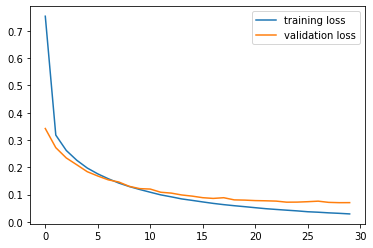

In [10]:
plt.plot(running_loss_history,label='training loss')
plt.plot(val_running_loss_history, label = 'validation loss')
plt.legend()

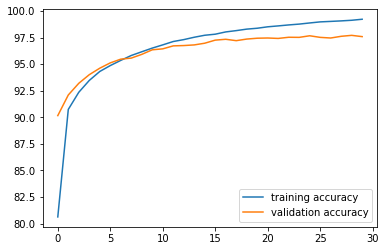

In [11]:
plt.plot(running_corrects_history, label='training accuracy')
plt.plot(val_running_corrects_history, label= 'validation accuracy')
plt.legend()